In [5]:
import pandas as pd
df = pd.read_csv("mpesa_transactions.csv")

# For the timestamp
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format="%d-%m-%y %H:%M")
df['Month'] = df['Timestamp'].dt.to_period('M')
df['Day'] = df['Timestamp'].dt.date
df['Hour'] = df['Timestamp'].dt.hour

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

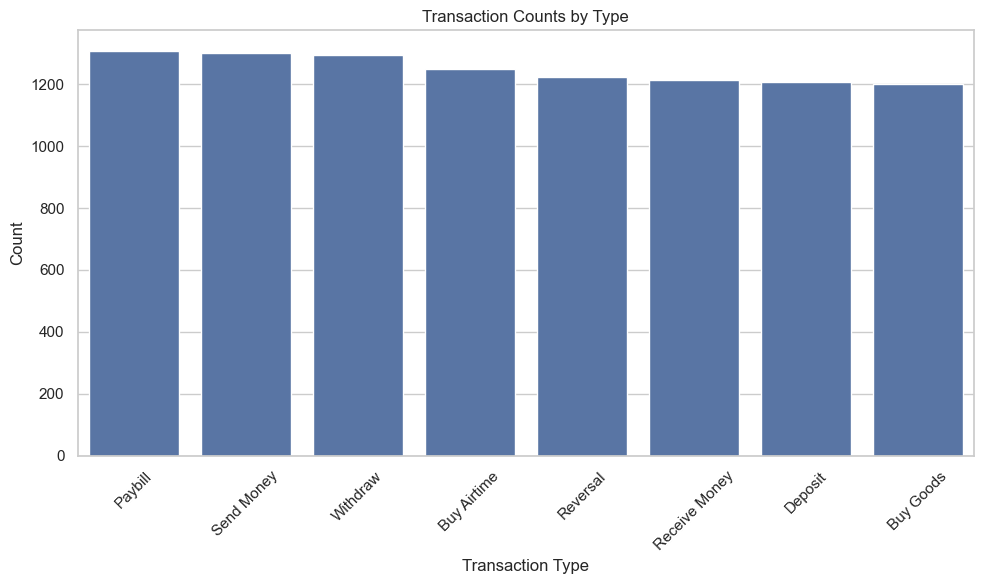

In [4]:
# To show which transaction types happen most over time

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Transaction_Type', order=df['Transaction_Type'].value_counts().index)
plt.title('Transaction Counts by Type')
plt.xticks(rotation=45)
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


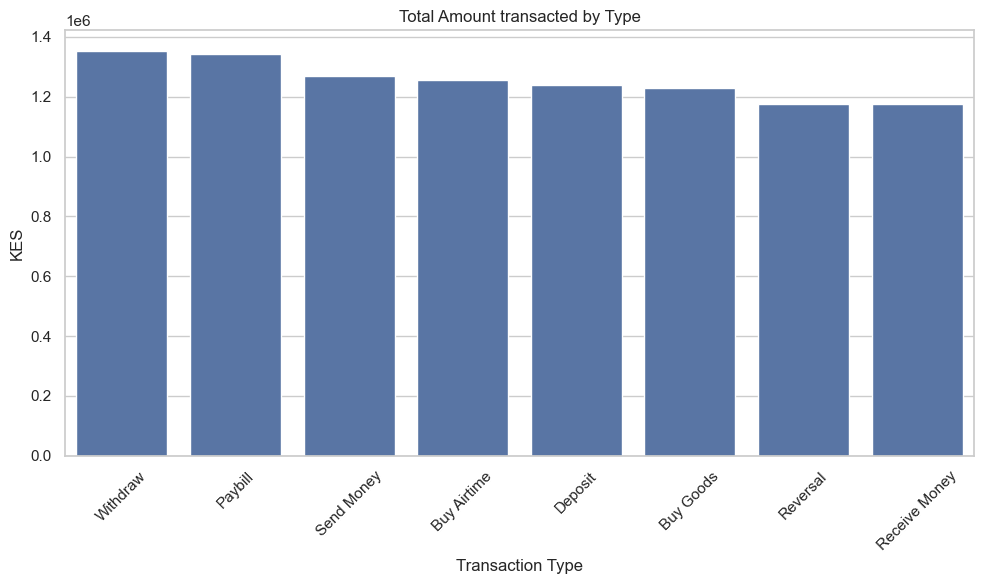

In [5]:
# To show which Transaction types move most money

amount_by_type =df.groupby('Transaction_Type')['Amount'].sum().sort_values(ascending = False)

plt.figure(figsize=(10,6))
sns.barplot(x = amount_by_type.index, y=amount_by_type.values)
plt.title('Total Amount transacted by Type')
plt.xticks(rotation=45)
plt.xlabel('Transaction Type')
plt.ylabel('KES')
plt.tight_layout()
plt.show()


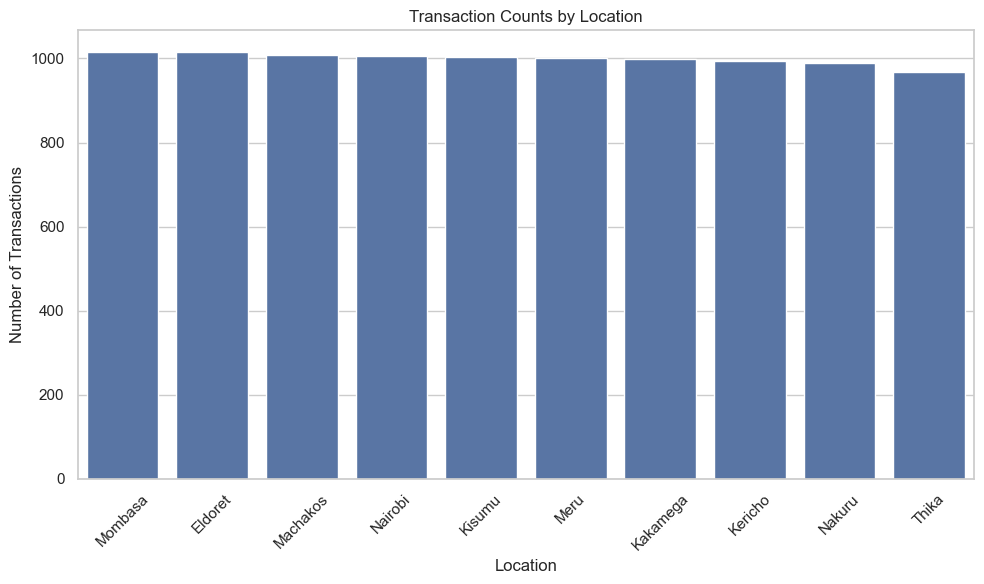

In [6]:
# To show which loactions move the most money

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Location', order=df['Location'].value_counts().index)
plt.title('Transaction Counts by Location')
plt.xticks(rotation=45)
plt.xlabel('Location')
plt.ylabel('Number of Transactions')
plt.tight_layout()
plt.show()

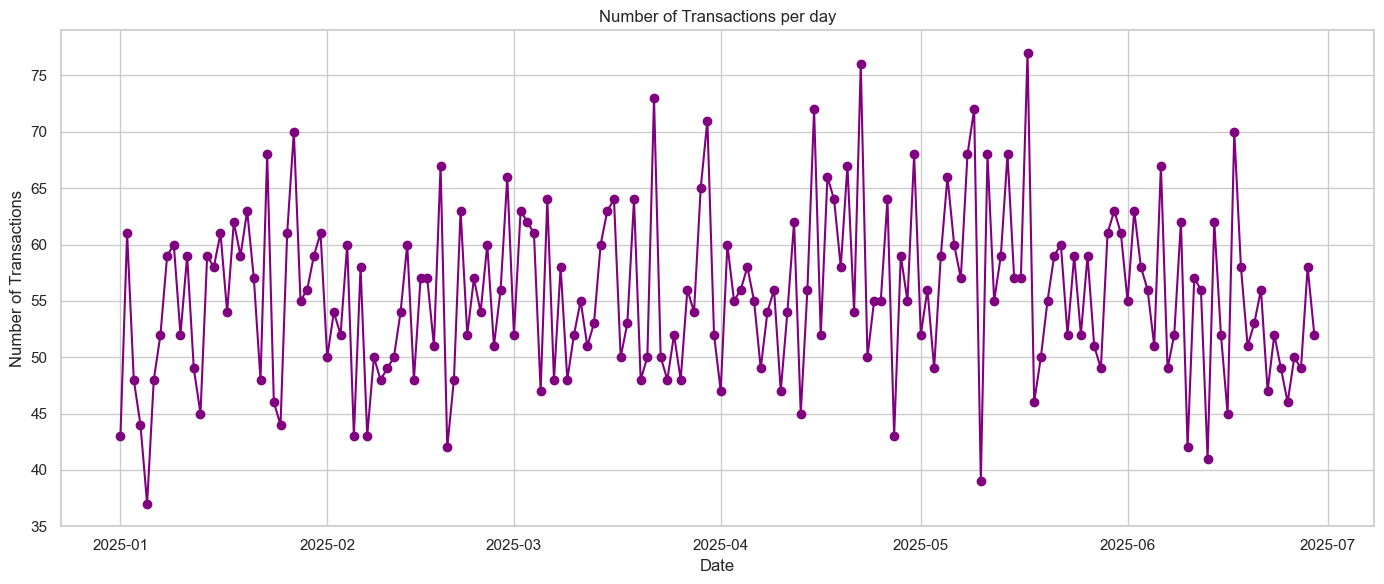

In [16]:
# TIME SERIES TRENDS
# Transactions per day

daily_counts = df.groupby('Day').size()

plt.figure(figsize=(14,6))
daily_counts.plot(kind ='line' , marker='o',color ='purple')
plt.title('Number of Transactions per day')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.tight_layout()
plt.show()

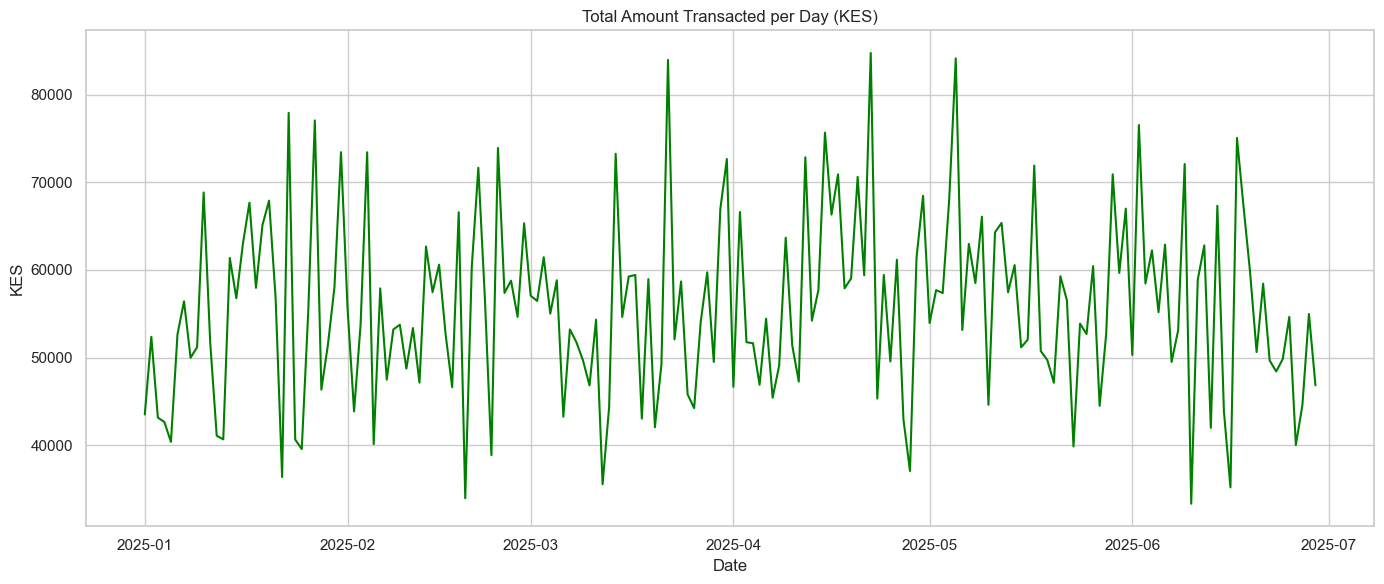

In [17]:
# Total Amount Transacted per Day

daily_counts = df.groupby('Day')['Amount'].sum()

plt.figure(figsize=(14,6))
daily_counts.plot(kind ='line' , color='green')
plt.title('Total Amount Transacted per Day (KES)')
plt.xlabel('Date')
plt.ylabel('KES')
plt.grid(True)
plt.tight_layout()
plt.show()

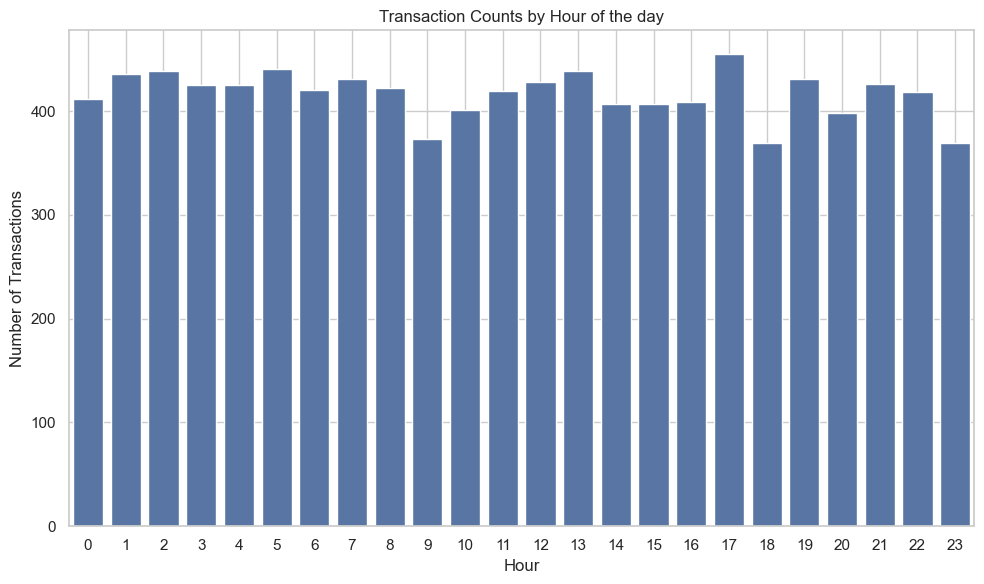

In [18]:
# Hourly Pattern Acrosss the days

plt.figure(figsize=(10,6))
sns.countplot(x='Hour', data =df)
plt.title('Transaction Counts by Hour of the day')
plt.xlabel('Hour')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.tight_layout()
plt.show()

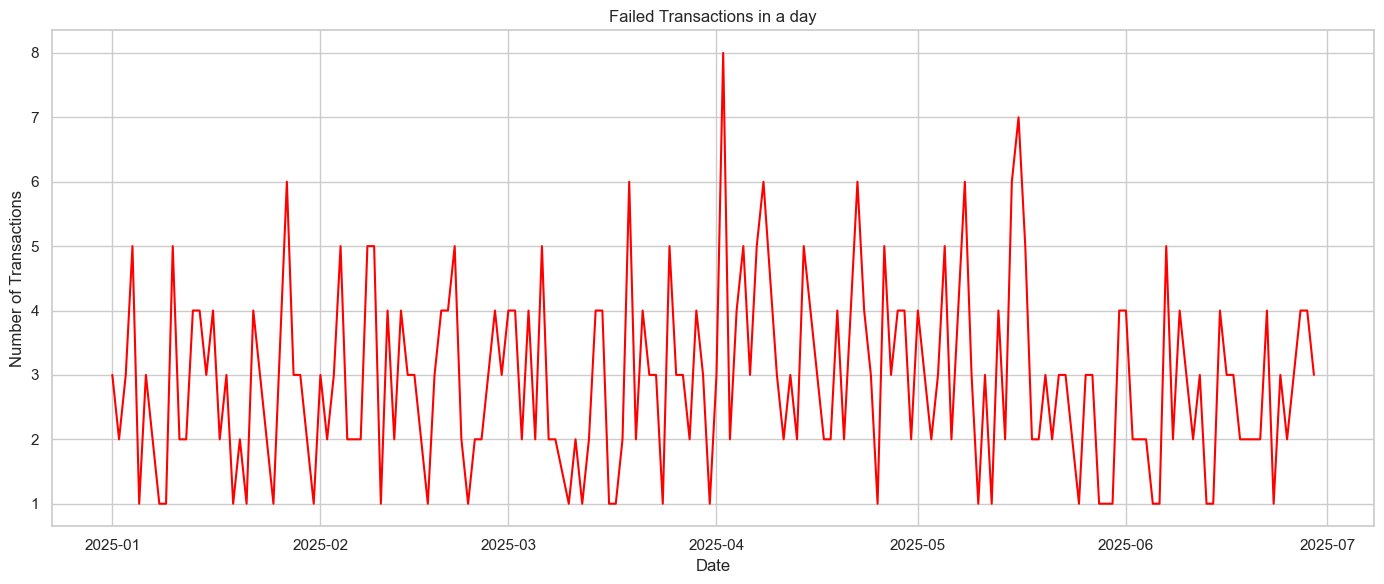

In [7]:
# ANOMALY DETECTION

# Failed Transactions

failed_df = df[df['Status'] == 'Failed']
failed_per_day = failed_df.groupby('Day').size()

plt.figure(figsize=(14,6))
failed_per_day.plot(kind ='line' , color='red')
plt.title('Failed Transactions in a day')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
# Unusual Transactions

from scipy.stats import zscore

df['Amount_z'] = zscore(df['Amount'])
anomalies = df[df['Amount_z'].abs()>3]
print("Unusual Transactions")

Unusual Transactions


In [10]:
# Users that have high failure rates

failed_by_user = failed_df['User_ID'].value_counts().head(10)
print(failed_by_user)

User_ID
725759816    5
757699517    5
755524093    4
766114965    4
798451749    4
741569860    4
748788680    4
751813625    4
743972606    4
721177690    4
Name: count, dtype: int64
